In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
df = pd.read_csv('dataset\data.csv', delimiter=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
categorical = np.array(['Application mode', 'Application order', 'Course','Previous qualification','Nacionality',
                        'Marital status', 'Mother\'s qualification', 'Father\'s qualification','Mother\'s occupation','Father\'s occupation'])
numerical = np.array(['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
                      'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)',
                      'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                      'Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
                      'Previous qualification (grade)','Admission grade','Age at enrollment','Unemployment rate','Inflation rate', 'GDP'])
binary = np.array(['Daytime/evening attendance\t','Displaced', 'Educational special needs', 'Debtor','Tuition fees up to date','Gender',
                   'Scholarship holder','International'])

# Encode Target

In [4]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_target_arr = enc.fit_transform(df.Target.values.reshape(-1,1)).toarray()
enc_target_df = pd.DataFrame(enc_target_arr, columns = list(enc.categories_[0]))
prepro_df = pd.concat([df.drop(columns=["Target"]), enc_target_df], axis = 1)
prepro_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.000000,0,10.8,1.4,1.74,1.0,0.0,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,13.666667,0,13.9,-0.3,0.79,0.0,0.0,1.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,0.000000,0,10.8,1.4,1.74,1.0,0.0,0.0
3,1,17,2,9773,1,1,122.0,1,38,37,...,10,5,12.400000,0,9.4,-0.8,-3.12,0.0,0.0,1.0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,13.000000,0,13.9,-0.3,0.79,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,8,5,12.666667,0,15.5,2.8,-4.06,0.0,0.0,1.0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,2,11.000000,0,11.1,0.6,2.02,1.0,0.0,0.0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,9,1,13.500000,0,13.9,-0.3,0.79,1.0,0.0,0.0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,6,5,12.000000,0,9.4,-0.8,-3.12,0.0,0.0,1.0


# MinMax Scale Numerical Attributes

In [5]:
prepro_df[numerical].describe().round(2)

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Previous qualification (grade),Admission grade,Age at enrollment,Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,132.61,126.98,23.27,11.57,1.23,0.00
std,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,13.19,14.48,7.59,2.66,1.38,2.27
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,95.00,95.00,17.00,7.60,-0.80,-4.06
25%,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,125.00,117.90,19.00,9.40,0.30,-1.70
50%,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,133.10,126.10,20.00,11.10,1.40,0.32
75%,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,140.00,134.80,25.00,13.90,2.60,1.79
max,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,190.00,190.00,70.00,16.20,3.70,3.51


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
prepro_df[numerical] = pd.DataFrame(scaler.fit_transform(prepro_df[numerical]), columns = numerical)
prepro_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Dropout,Enrolled,Graduate
0,1,17,5,171,1,1,0.284211,1,19,12,...,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0,0.0,0.0
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0.0,0.0,1.0
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1.0,0.0,0.0
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0.0,0.0,1.0
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,0.315789,1,1,1,...,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000,0.0,0.0,1.0
4420,1,1,2,9773,1,1,0.263158,105,1,1,...,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170,1.0,0.0,0.0
4421,1,1,1,9500,1,1,0.621053,1,37,37,...,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687,1.0,0.0,0.0
4422,1,1,1,9147,1,1,0.894737,1,37,37,...,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174,0.0,0.0,1.0


# Data Visualization

c:\Users\k8eli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\k8eli\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\k8eli\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


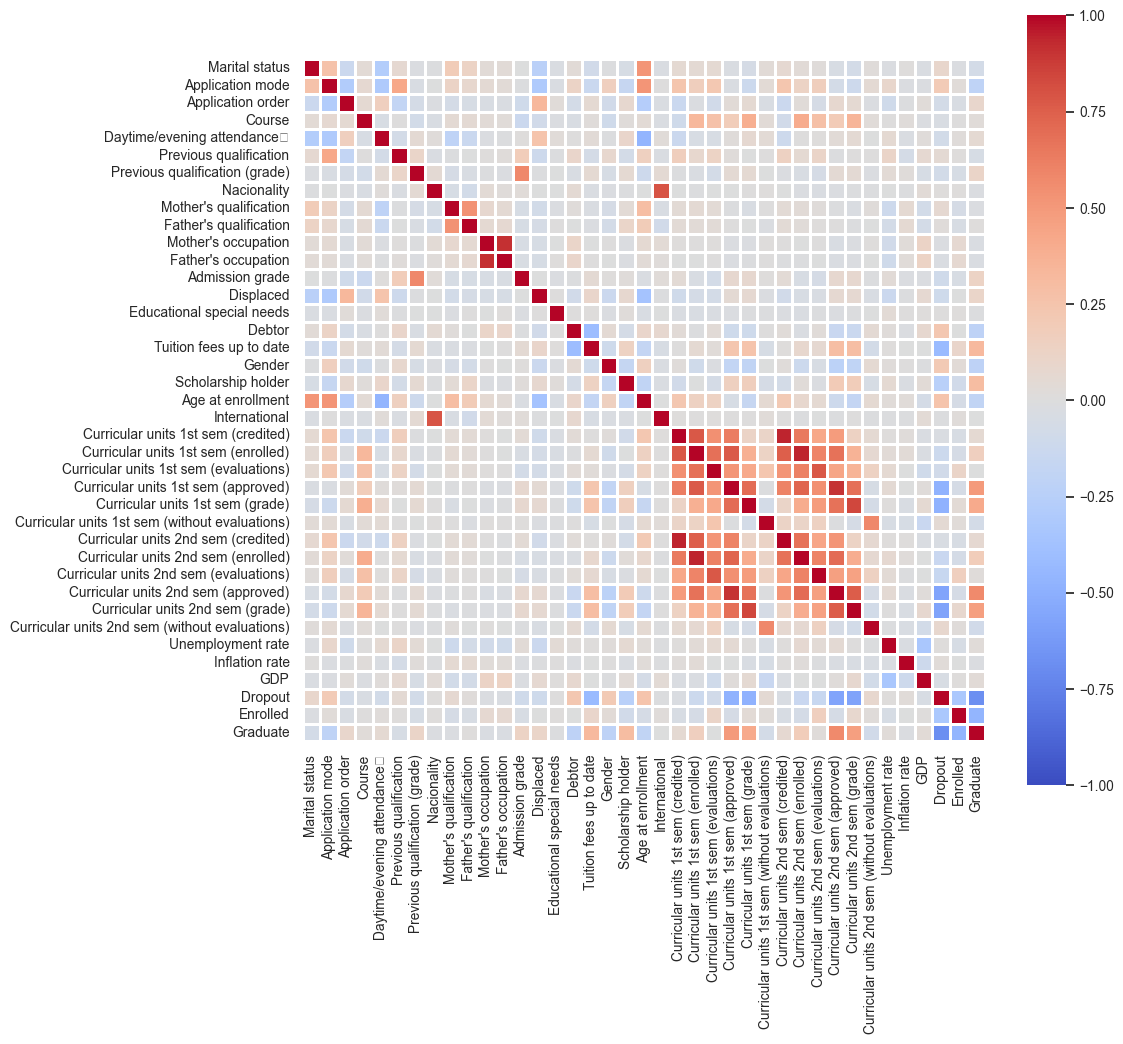

In [7]:
sns.set(rc = {'figure.figsize':(11,10)})
sns.set(font_scale=0.9)
corr = prepro_df.corr()
graph = sns.heatmap(corr, cmap= 'coolwarm', square = True,
                    vmin = -1, vmax = 1, center = 0,
                    linewidths = 1, linecolor='white')

In [8]:
df_vis = pd.concat([prepro_df.drop(columns = ["Dropout", "Enrolled", "Graduate"]), df.Target], axis = 1)

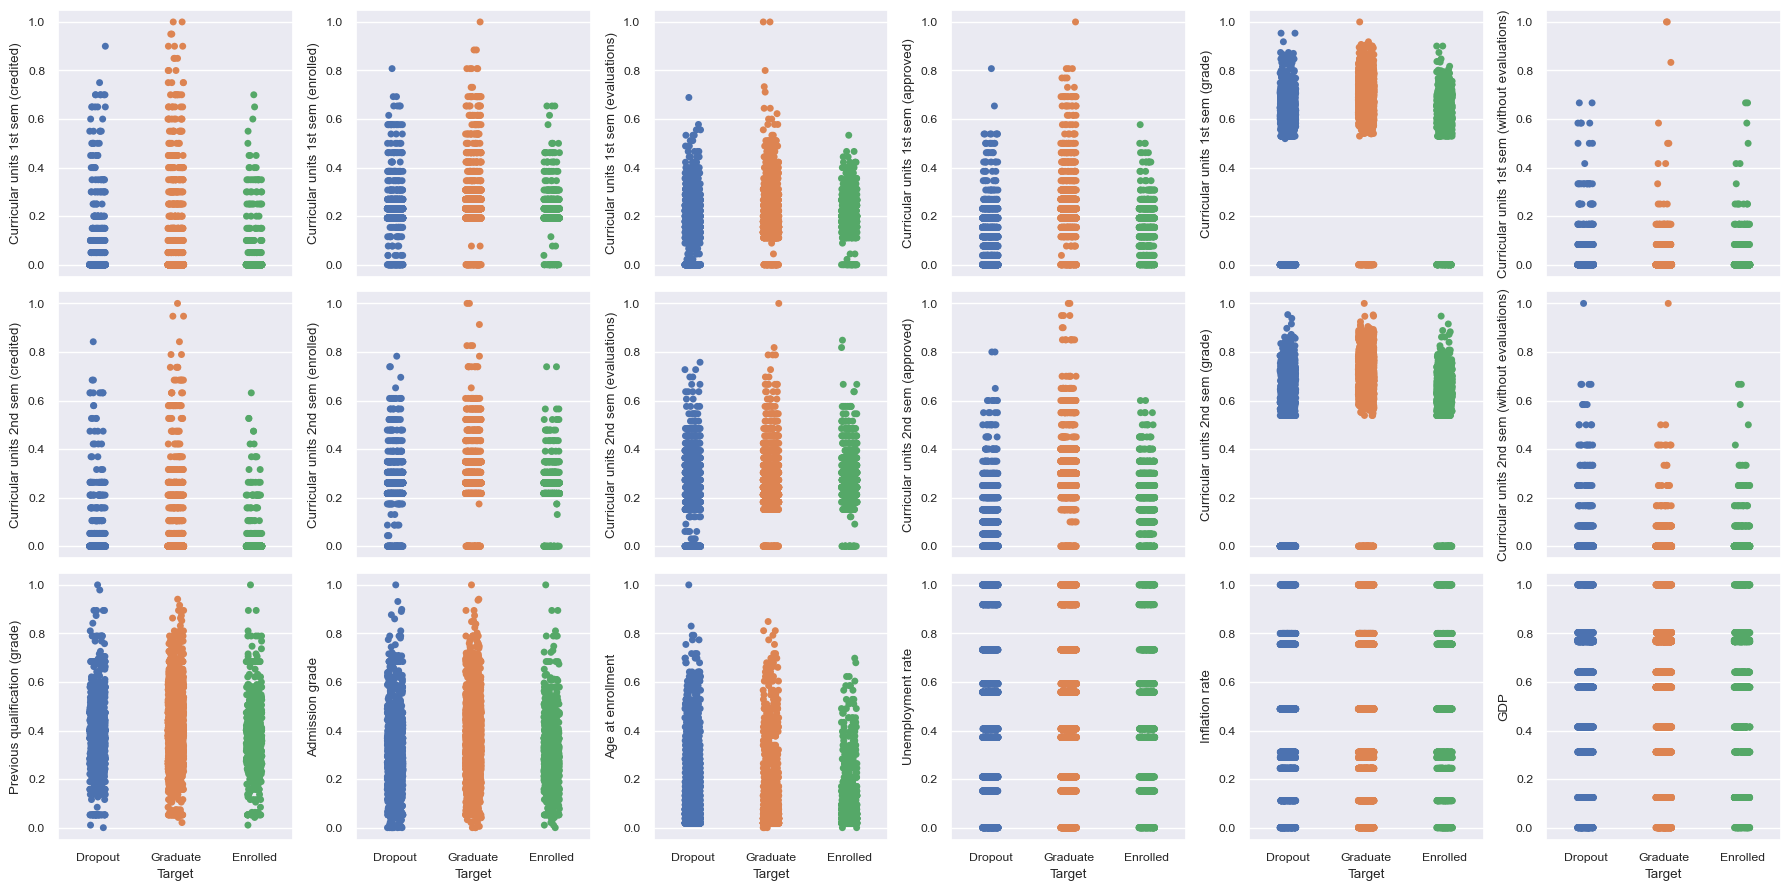

In [9]:
sns.set(font_scale=0.8)
figure, axes = plt.subplots(3,6, sharex = True, figsize = (18,9))
for x in range(3):
    for y in range(6):
        sns.stripplot(ax = axes[x,y], data = df_vis, x = "Target", hue = "Target", y = numerical[6*x+y])
figure.tight_layout()
plt.show()

In [10]:
for var in binary:
    df_vis[var] = df_vis.apply(lambda row: "yes" if row[var] == 1 else "no", axis=1)

df_vis['Gender'] = df_vis.apply(lambda row: "female" if row['Gender'] == "no" else "male", axis=1)
df_vis['Daytime/evening attendance\t'] = df_vis.apply(lambda row: "daytime" if row['Daytime/evening attendance\t'] == "yes" else "evening", axis=1)

C:\Users\k8eli\AppData\Local\Temp\ipykernel_17596\1000300896.py:6: UserWarning: Glyph 9 (	) missing from current font.
  figure.tight_layout()
C:\Users\k8eli\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


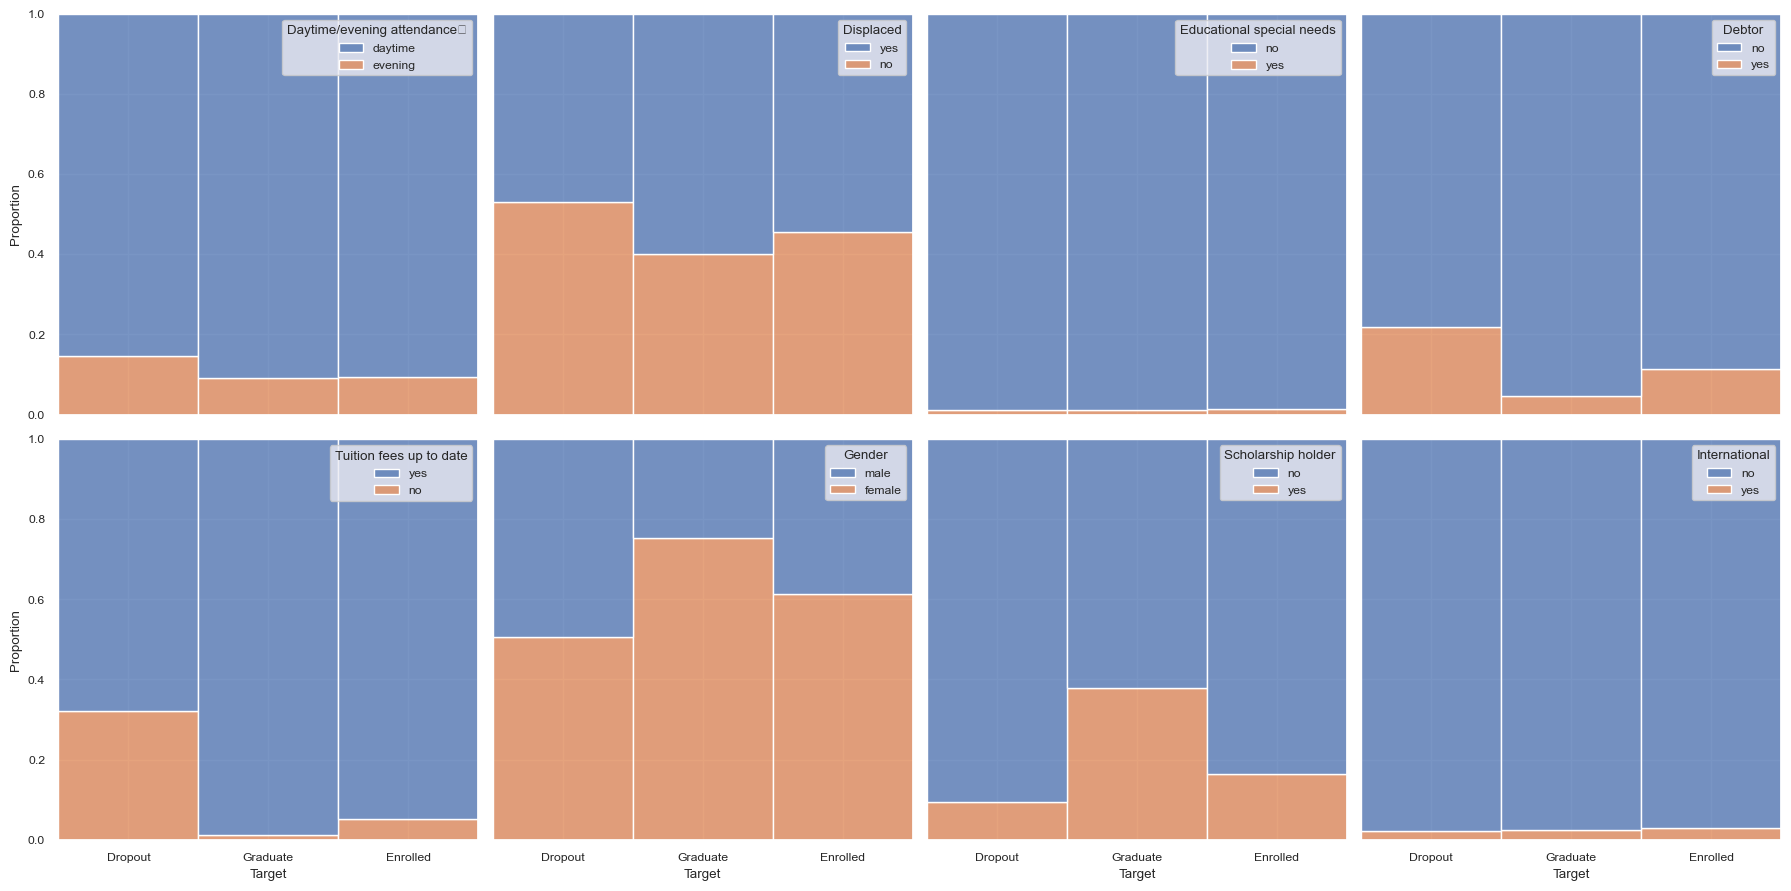

In [11]:
sns.set(font_scale=0.8)
figure, axes = plt.subplots(2,4, sharex = True, sharey = True, figsize = (18,9))
for x in range(2):
    for y in range(4):
        sns.histplot(ax = axes[x,y], data = df_vis, x = "Target", hue = binary[4*x+y], multiple="fill", stat="proportion")
figure.tight_layout()
plt.show()

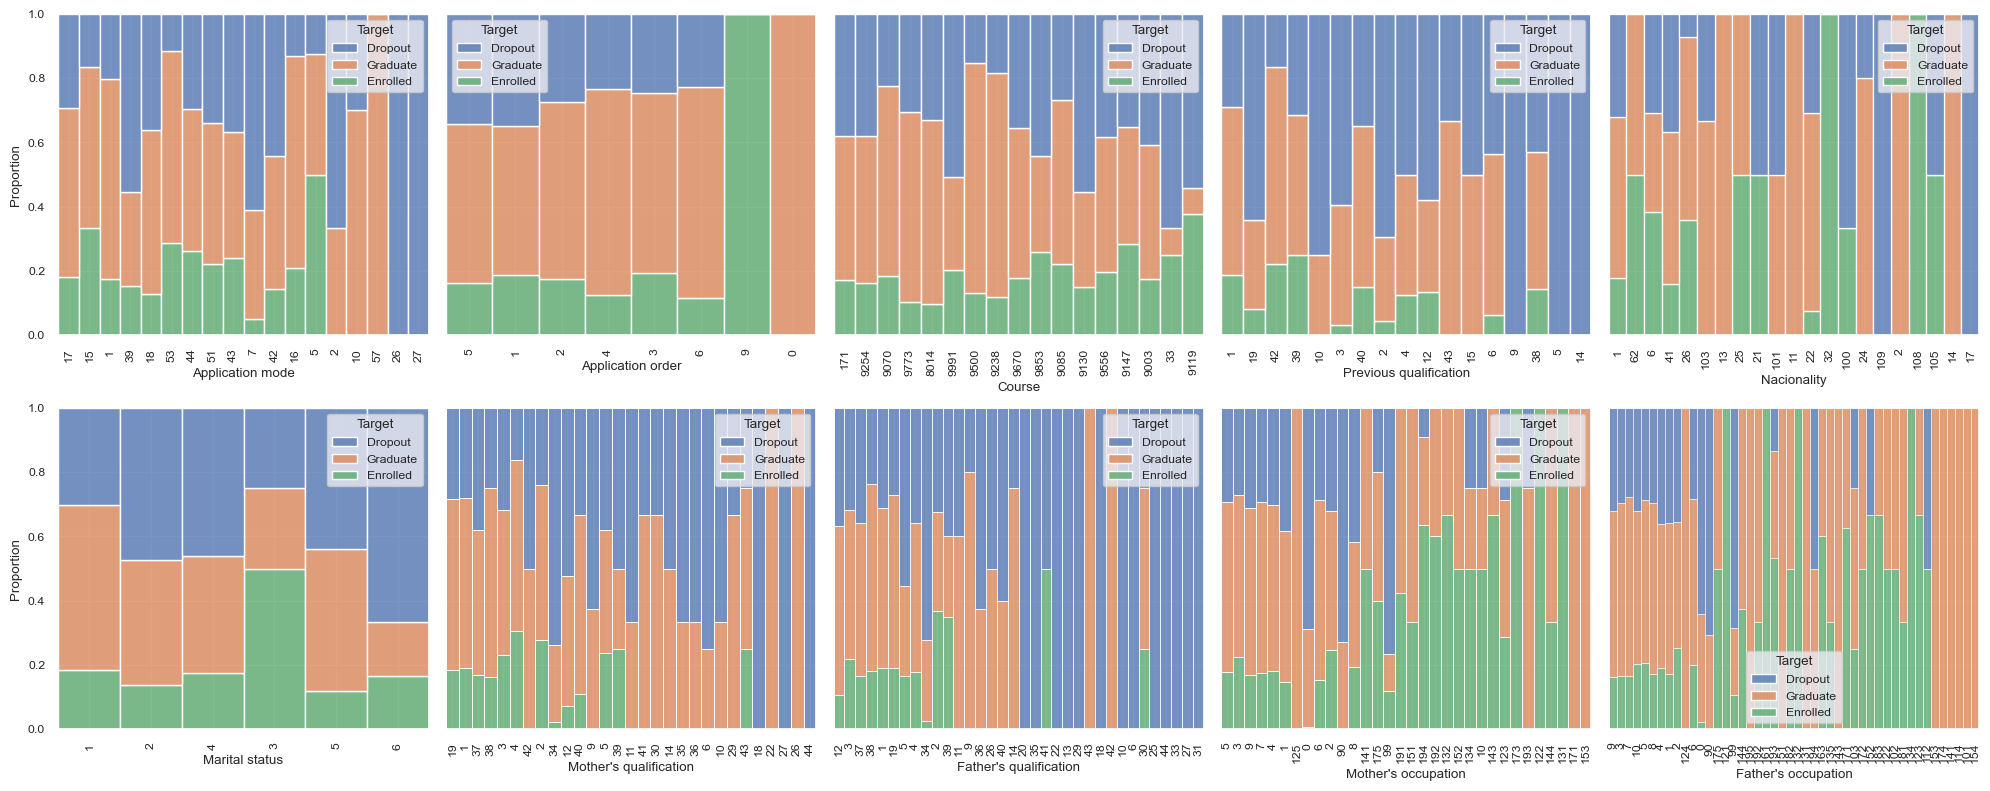

In [12]:
for var in categorical:
    df_vis[var] = df_vis[var].apply(str)

sns.set(font_scale=0.8)
figure, axes = plt.subplots(2,5, figsize = (20,8), sharey = True, )
for x in range(2):
    for y in range(5):
        sns.histplot(ax = axes[x,y], data = df_vis, x = categorical[5*x+y], hue = "Target", multiple="fill", stat="proportion")
        axes[x,y].tick_params(axis='x', labelrotation=90)
figure.tight_layout()
plt.show()